In [685]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from datetime import datetime
from datetime import date
from datetime import time
import matplotlib.pyplot as plt

#for weekday names and month names i might use abbravation: list(calendar.day_name)
import calendar

#to measure hourly daily frequencies
from collections import Counter

#### alternative json reading method

In [636]:
'''
with open('ultimate_data_challenge.json') as f:
  data = json.load(f)
'''

"\nwith open('ultimate_data_challenge.json') as f:\n  data = json.load(f)\n"

In [637]:
log=pd.read_json('logins.json')
udt=pd.read_json('ultimate_data_challenge.json')

# part I  Exploratory data analysis

In [638]:
log.columns

Index(['login_time'], dtype='object')

In [639]:
log.sample(5)

,login_time
12965,1970-01-19 19:50:56
39318,1970-02-22 01:32:02
63660,1970-03-17 17:22:20
28129,1970-02-09 21:51:42
21555,1970-02-01 04:30:04


In [640]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


#### sort and login times with 15 min interval

In [641]:
log['count'] = 1
log.sort_index(inplace=True)
log_aggregated=pd.DataFrame(log.groupby([pd.Grouper(key='login_time', freq='15Min')]).sum()).reset_index()
log_aggregated.sample(10)

,login_time,count
8170,1970-03-27 22:30:00,18
3693,1970-02-09 07:15:00,4
4470,1970-02-17 09:30:00,7
8160,1970-03-27 20:00:00,14
129,1970-01-03 04:15:00,21
1079,1970-01-13 01:45:00,4
8970,1970-04-05 06:30:00,5
899,1970-01-11 04:45:00,45
3210,1970-02-04 06:30:00,0
8536,1970-03-31 18:00:00,7


In [642]:
''' another 15minute resempling method

df.resample('15T').asfreq()
'''

" another 15minute resempling method\n\ndf.resample('15T').asfreq()\n"

In [643]:
#log_agg.set_index('login_time', inplace=True)

In [644]:
log_aggregated.isna().sum()

login_time    0
count         0
dtype: int64

In [645]:
log_aggregated.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


visualize and observer if there is a correlation with days, i might use it during analyzing

In [646]:
login_days=log_aggregated['login_time'].dt.day_name()
login_days

0       Thursday
1       Thursday
2       Thursday
3       Thursday
4       Thursday
          ...   
9783      Monday
9784      Monday
9785      Monday
9786      Monday
9787      Monday
Name: login_time, Length: 9788, dtype: object

In [ ]:
#week day names from unique values
days=login_days.unique()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

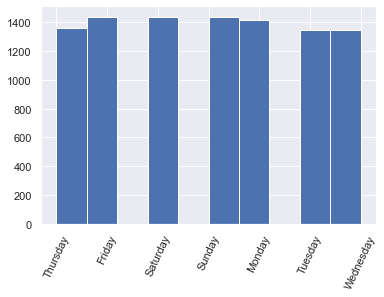

In [681]:
#use days variable as xticks
login_days.hist()
plt.xticks(rotation = 65)

visualize and observer if there is a pattern in hours like during midnight,in the morning...

In [676]:
hours=log['login_time'].dt.hour
hours

0        20
1        20
2        20
3        20
4        20
         ..
93137    18
93138    18
93139    18
93140    18
93141    18
Name: login_time, Length: 93142, dtype: int64

<AxesSubplot:>

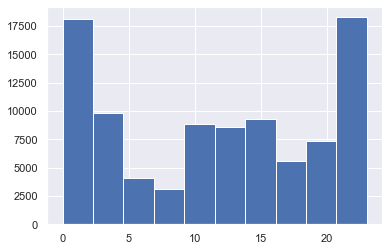

In [677]:
hours.hist()

yes! in the morning there are less demand than in the evening. the demand becomes the highest midnights

TypeError: the dtypes of parameters x (object) and width (timedelta64[h]) are incompatible

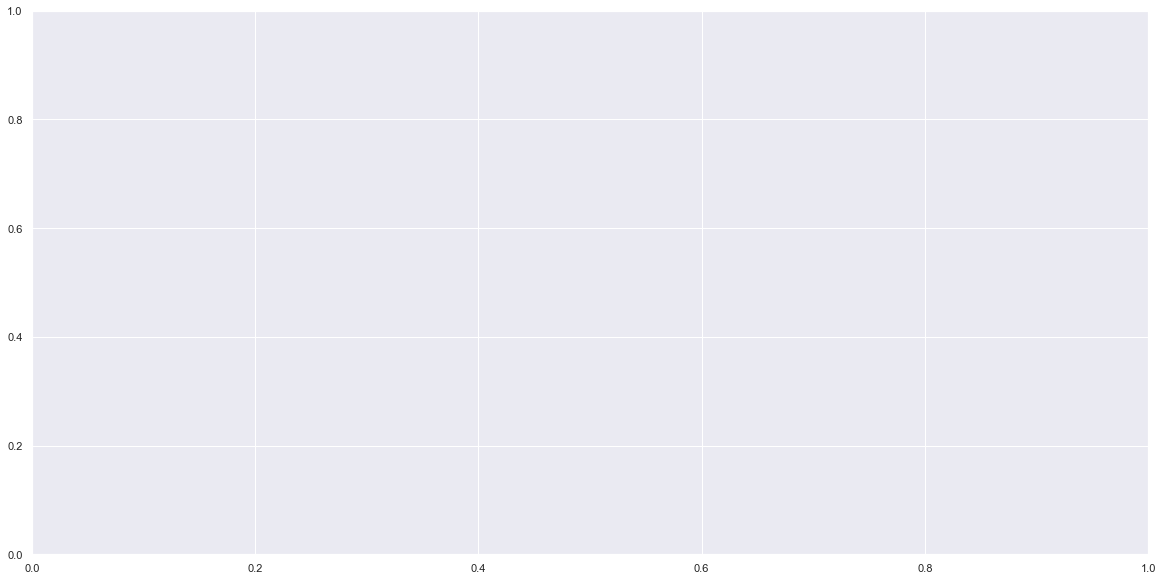

In [704]:
plt.figure(figsize=(20, 10))
plt.bar(Counter(hours), hours.unique, color='grey',  width=np.timedelta64(12, 'h')) 
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Hours Plot')
sns.set()

### visualization part

In [ ]:
log_aggregated['count'].plot()
plt.xlabel("X axis label")
plt.ylabel("Y axis label")

In [ ]:
log_agg.rolling(window=500).mean().plot()
plt.show()

there is definitly an upward trend. that's why i need to draw slope line

when we limit the date interval with only one month, we see that there are small discrete waves and we assume they are weekends because there are nearly 4 of them in a month.

let's do the same for one day and see daily logins 

In [ ]:
log_agg.head()

In [ ]:
log_agg.loc['1970-02-01':'1970-02-02' ]

mostly the app usage,taxi calls are at it's peak after midnight, which is pretty understandable

now let's see overall smoothed app usage rolling sums together with un smoothed data for 1 week

In [ ]:
unsmoothed = login_times_agg['count'].loc['1970-02-01':'1970-02-07']
smoothed = unsmoothed.rolling(window=100).mean()
one_week = pd.DataFrame({'unsmoothed':unsmoothed, 'smoothed':smoothed})
one_week.plot()
plt.show()

In [ ]:
login_times_agg.columns

let's check login hours

first:i couldn't inlcude index column into my analysis, let's create another column with index variables

In [ ]:
login_times_agg['index'] = login_times_agg.index

In [ ]:
pd.to_datetime(login_times_agg['index'])

let's check dtypes

In [ ]:
login_times_agg.dtypes

let's see if we can see login hours

In [ ]:
login_times_agg['index'].dt.hour

In [ ]:
hour=login_times_agg['index'].dt.hour

now use histogram to see most active days and hours

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(hour, hour.Counter, color='grey', width=1)
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Hours Plot')
sns.set()

# part II Experiment and metrics design
